In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('fifa21_male3.csv')
data

,ID,Age,OVA,BOV,POT,height,Weight,Value,Wage,Attacking,...,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,2,33,69,71,69,182.88,181,625K,7K,313,...,2,Medium,High,2,71,59,70,71,68,69
1,16,37,71,70,71,177.80,143,600K,7K,337,...,3,Medium,Medium,1,53,69,73,69,58,63
2,27,33,71,71,71,175.26,161,1.1M,15K,337,...,4,Medium,Low,2,45,68,76,77,36,52
3,36,36,68,70,82,180.34,165,0,0,264,...,1,NaN,NaN,1,61,66,66,69,47,60
4,41,36,81,82,81,170.18,150,5.5M,12K,367,...,4,High,Medium,4,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,22,64,66,69,198.12,165,550K,2K,197,...,2,Medium,Medium,1,54,30,37,48,64,69
17121,259090,18,56,58,66,177.80,170,130K,3K,248,...,2,Medium,Medium,1,62,46,57,56,43,55
17122,259091,18,56,56,67,175.26,154,130K,2K,218,...,2,Medium,Medium,1,63,35,44,52,54,55
17123,259101,20,62,62,73,175.26,148,475K,3K,223,...,2,High,Medium,1,71,34,58,59,59,54


In [3]:
data.columns = [col_name.lower().replace(' ', '_').replace('/', '') for col_name in data.columns]
data.columns

Index(['id', 'age', 'ova', 'bov', 'pot', 'height', 'weight', 'value', 'wage',
       'attacking', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'skill', 'dribbling', 'curve',
       'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'total_stats', 'base_stats', 'wf', 'sm', 'aw', 'dw',
       'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17125 non-null  int64  
 1   age               17125 non-null  int64  
 2   ova               17125 non-null  int64  
 3   bov               17125 non-null  int64  
 4   pot               17125 non-null  int64  
 5   height            17125 non-null  float64
 6   weight            17125 non-null  int64  
 7   value             17125 non-null  object 
 8   wage              17125 non-null  object 
 9   attacking         17125 non-null  int64  
 10  crossing          17125 non-null  int64  
 11  finishing         17125 non-null  int64  
 12  heading_accuracy  17125 non-null  int64  
 13  short_passing     17125 non-null  int64  
 14  volleys           17067 non-null  float64
 15  skill             17125 non-null  int64  
 16  dribbling         17125 non-null  int64 

In [5]:
data.describe()

,id,age,ova,bov,pot,height,weight,attacking,crossing,finishing,...,base_stats,wf,sm,ir,pac,sho,pas,dri,def,phy
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,181.222956,165.658861,258.537752,51.621314,47.956672,...,361.372146,2.985927,2.452496,1.152234,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,6.886553,15.818185,72.255687,17.875715,19.391547,...,40.252290,0.672551,0.781285,0.461311,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,154.940000,110.000000,33.000000,6.000000,3.000000,...,228.000000,1.000000,1.000000,1.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,175.260000,154.000000,232.000000,41.000000,33.000000,...,333.000000,3.000000,2.000000,1.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,180.340000,165.000000,271.000000,56.000000,52.000000,...,362.000000,3.000000,2.000000,1.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,243911.000000,29.000000,72.000000,72.000000,76.000000,185.420000,176.000000,306.000000,65.000000,64.000000,...,390.000000,3.000000,3.000000,1.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,259105.000000,53.000000,93.000000,93.000000,95.000000,205.740000,243.000000,437.000000,94.000000,95.000000,...,498.000000,5.000000,5.000000,5.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


In [6]:
data = data.set_index("id")
data

,age,ova,bov,pot,height,weight,value,wage,attacking,crossing,...,sm,aw,dw,ir,pac,sho,pas,dri,def,phy
id,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,182.88,181,625K,7K,313,75,...,2,Medium,High,2,71,59,70,71,68,69
16,37,71,70,71,177.80,143,600K,7K,337,68,...,3,Medium,Medium,1,53,69,73,69,58,63
27,33,71,71,71,175.26,161,1.1M,15K,337,80,...,4,Medium,Low,2,45,68,76,77,36,52
36,36,68,70,82,180.34,165,0,0,264,54,...,1,NaN,NaN,1,61,66,66,69,47,60
41,36,81,82,81,170.18,150,5.5M,12K,367,75,...,4,High,Medium,4,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,64,66,69,198.12,165,550K,2K,197,35,...,2,Medium,Medium,1,54,30,37,48,64,69
259090,18,56,58,66,177.80,170,130K,3K,248,50,...,2,Medium,Medium,1,62,46,57,56,43,55
259091,18,56,56,67,175.26,154,130K,2K,218,55,...,2,Medium,Medium,1,63,35,44,52,54,55


In [7]:
categoricals = data.select_dtypes('object')
categoricals

,value,wage,aw,dw
id,,,,
2,625K,7K,Medium,High
16,600K,7K,Medium,Medium
27,1.1M,15K,Medium,Low
36,0,0,NaN,NaN
41,5.5M,12K,High,Medium
...,...,...,...,...
259088,550K,2K,Medium,Medium
259090,130K,3K,Medium,Medium
259091,130K,2K,Medium,Medium


In [8]:
def clean_numbers(value):
    if "K" in value:
        return int(value.upper().replace("K", ""))* 1000
    elif "M" in value:
        return int(float(value.upper().replace("M", ""))* 1000000)
    else:
        return 0

In [9]:
data['value'] = data['value'].apply(clean_numbers)
data['value']

id
2          625000
16         600000
27        1100000
36              0
41        5500000
           ...   
259088     550000
259090     130000
259091     130000
259101     475000
259105     325000
Name: value, Length: 17125, dtype: int64

In [10]:
data['wage'] = data['wage'].apply(clean_numbers)
data['wage']

id
2          7000
16         7000
27        15000
36            0
41        12000
          ...  
259088     2000
259090     3000
259091     2000
259101     3000
259105     2000
Name: wage, Length: 17125, dtype: int64

In [11]:
numericals = data.select_dtypes('number')
numericals

,age,ova,bov,pot,height,weight,value,wage,attacking,crossing,...,base_stats,wf,sm,ir,pac,sho,pas,dri,def,phy
id,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,182.88,181,625000,7000,313,75,...,408,3,2,2,71,59,70,71,68,69
16,37,71,70,71,177.80,143,600000,7000,337,68,...,385,4,3,1,53,69,73,69,58,63
27,33,71,71,71,175.26,161,1100000,15000,337,80,...,354,4,4,2,45,68,76,77,36,52
36,36,68,70,82,180.34,165,0,0,264,54,...,369,3,1,1,61,66,66,69,47,60
41,36,81,82,81,170.18,150,5500000,12000,367,75,...,420,4,4,4,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,64,66,69,198.12,165,550000,2000,197,35,...,302,2,2,1,54,30,37,48,64,69
259090,18,56,58,66,177.80,170,130000,3000,248,50,...,319,3,2,1,62,46,57,56,43,55
259091,18,56,56,67,175.26,154,130000,2000,218,55,...,303,3,2,1,63,35,44,52,54,55


In [53]:
data1.isna().sum().sort_values(ascending=False)

ova              0
long_shots       0
dri              0
pas              0
sho              0
pac              0
ir               0
dw               0
aw               0
sm               0
base_stats       0
penalties        0
vision           0
mentality        0
stamina          0
pot              0
shot_power       0
power            0
reactions        0
movement         0
long_passing     0
fk_accuracy      0
volleys          0
short_passing    0
finishing        0
crossing         0
attacking        0
value            0
phy              0
dtype: int64

In [13]:
#dropping column with highest number of Nan
data.drop('composure', axis=1, inplace=True)

In [14]:
data['volleys'].fillna(value=data['volleys'].mean(), inplace=True)
data['vision'].fillna(value=data['vision'].mean(), inplace=True)

In [15]:
data.corrwith(data['value']).sort_values(ascending=True)

height             -0.000407
weight              0.040257
age                 0.095981
sliding_tackle      0.104354
balance             0.120276
standing_tackle     0.124010
defending           0.130548
jumping             0.132739
strength            0.135754
interceptions       0.150599
wf                  0.151324
marking             0.153409
acceleration        0.163262
heading_accuracy    0.167476
sprint_speed        0.168164
def                 0.172856
agility             0.189814
aggression          0.189843
penalties           0.201095
pac                 0.210809
stamina             0.229810
finishing           0.231430
fk_accuracy         0.233665
positioning         0.245065
crossing            0.249098
volleys             0.255352
long_shots          0.256569
dribbling           0.260361
movement            0.263764
phy                 0.266541
curve               0.274536
sm                  0.278000
attacking           0.289886
ball_control        0.294168
skill         

In [16]:
#dropping low correlated column with value
data.drop(['age','height','weight','heading_accuracy','balance','jumping','strength','aggression','interceptions','wf','def'], axis=1, inplace=True)

#dropping highly correlated column with value
data.drop('wage', axis=1, inplace=True)
data

,ova,bov,pot,value,attacking,crossing,finishing,short_passing,volleys,skill,...,base_stats,sm,aw,dw,ir,pac,sho,pas,dri,phy
id,,,,,,,,,,,,,,,,,,,,,
2,69,71,69,625000,313,75,50,71,58.000000,338,...,408,2,Medium,High,2,71,59,70,71,69
16,71,70,71,600000,337,68,64,76,68.000000,369,...,385,3,Medium,Medium,1,53,69,73,69,63
27,71,71,71,1100000,337,80,64,77,75.000000,387,...,354,4,Medium,Low,2,45,68,76,77,52
36,68,70,82,0,264,54,70,80,45.005742,255,...,369,1,NaN,NaN,1,61,66,66,69,60
41,81,82,81,5500000,367,75,69,90,79.000000,408,...,420,4,High,Medium,4,58,70,85,85,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,64,66,69,550000,197,35,23,47,26.000000,193,...,302,2,Medium,Medium,1,54,30,37,48,69
259090,56,58,66,130000,248,50,43,64,41.000000,264,...,319,2,Medium,Medium,1,62,46,57,56,55
259091,56,56,67,130000,218,55,34,42,34.000000,212,...,303,2,Medium,Medium,1,63,35,44,52,55


In [17]:
corr_matrix = data.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

pd.set_option('display.max_rows', None)
print(sol)
pd.set_option('display.max_rows', 100)

defending        standing_tackle    0.986637
ova              bov                0.985877
defending        sliding_tackle     0.984905
standing_tackle  sliding_tackle     0.975145
defending        marking            0.965585
mentality        total_stats        0.946846
skill            ball_control       0.940458
dribbling        ball_control       0.939336
attacking        ball_control       0.934966
skill            curve              0.933768
                 dribbling          0.933575
attacking        skill              0.928429
skill            total_stats        0.927913
marking          standing_tackle    0.926621
acceleration     sprint_speed       0.925221
movement         acceleration       0.923923
                 agility            0.923807
marking          sliding_tackle     0.918173
short_passing    ball_control       0.915165
attacking        dribbling          0.914914
                 positioning        0.908397
                 total_stats        0.903393
short_pass

In [18]:
#droping highly collerated columns which have more than %90 corellation
data.drop(['bov','defending','curve','sprint_speed','acceleration','agility','sliding_tackle','marking','ball_control','dribbling','positioning','total_stats','skill','standing_tackle'], axis=1, inplace=True)
data

,ova,pot,value,attacking,crossing,finishing,short_passing,volleys,fk_accuracy,long_passing,...,base_stats,sm,aw,dw,ir,pac,sho,pas,dri,phy
id,,,,,,,,,,,,,,,,,,,,,
2,69,69,625000,313,75,50,71,58.000000,60,69,...,408,2,Medium,High,2,71,59,70,71,69
16,71,71,600000,337,68,64,76,68.000000,79,71,...,385,3,Medium,Medium,1,53,69,73,69,63
27,71,71,1100000,337,80,64,77,75.000000,77,69,...,354,4,Medium,Low,2,45,68,76,77,52
36,68,82,0,264,54,70,80,45.005742,46,64,...,369,1,NaN,NaN,1,61,66,66,69,60
41,81,81,5500000,367,75,69,90,79.000000,70,83,...,420,4,High,Medium,4,58,70,85,85,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,64,69,550000,197,35,23,47,26.000000,33,34,...,302,2,Medium,Medium,1,54,30,37,48,69
259090,56,66,130000,248,50,43,64,41.000000,50,61,...,319,2,Medium,Medium,1,62,46,57,56,55
259091,56,67,130000,218,55,34,42,34.000000,34,36,...,303,2,Medium,Medium,1,63,35,44,52,55


In [19]:
data.corr()

,ova,pot,value,attacking,crossing,finishing,short_passing,volleys,fk_accuracy,long_passing,...,vision,penalties,base_stats,sm,ir,pac,sho,pas,dri,phy
ova,1.000000,0.592268,0.631679,0.431238,0.386334,0.304012,0.492372,0.360915,0.369278,0.482655,...,0.505168,0.317666,0.832618,0.345421,0.474492,0.201319,0.487060,0.699229,0.643427,0.543354
pot,0.592268,1.000000,0.563570,0.233866,0.210944,0.173281,0.318544,0.176690,0.166233,0.283647,...,0.304512,0.147044,0.474763,0.241020,0.293444,0.259294,0.244481,0.395773,0.445004,0.159959
value,0.631679,0.563570,1.000000,0.289886,0.249098,0.231430,0.327682,0.255352,0.233665,0.306740,...,0.361418,0.201095,0.526843,0.278000,0.459631,0.210809,0.323770,0.444484,0.442156,0.266541
attacking,0.431238,0.233866,0.289886,1.000000,0.843765,0.878467,0.881208,0.897149,0.778319,0.729337,...,0.719344,0.838585,0.428602,0.767408,0.235135,0.180335,0.351248,0.373439,0.381863,0.104102
crossing,0.386334,0.210944,0.249098,0.843765,1.000000,0.651366,0.799446,0.677545,0.751177,0.736695,...,0.682905,0.633326,0.485306,0.709966,0.189826,0.304307,0.212267,0.505456,0.447862,-0.005856
finishing,0.304012,0.173281,0.231430,0.878467,0.651366,1.000000,0.652836,0.888488,0.697255,0.488630,...,0.696073,0.837941,0.360845,0.721507,0.166271,0.279985,0.609581,0.330078,0.471745,-0.066274
short_passing,0.492372,0.318544,0.327682,0.881208,0.799446,0.652836,1.000000,0.683927,0.719703,0.884601,...,0.705532,0.665632,0.474706,0.678817,0.246927,0.094001,0.154731,0.465977,0.351638,0.165171
volleys,0.360915,0.176690,0.255352,0.897149,0.677545,0.888488,0.683927,1.000000,0.743119,0.542833,...,0.696931,0.838326,0.390671,0.724654,0.247356,0.215211,0.549423,0.378513,0.457707,-0.008956
fk_accuracy,0.369278,0.166233,0.233665,0.778319,0.751177,0.697255,0.719703,0.743119,1.000000,0.687090,...,0.714250,0.731545,0.451769,0.674985,0.236006,0.141058,0.404164,0.530617,0.440673,-0.015594
long_passing,0.482655,0.283647,0.306740,0.729337,0.736695,0.488630,0.884601,0.542833,0.687090,1.000000,...,0.695030,0.521996,0.529285,0.566447,0.250315,0.032324,0.136612,0.575024,0.353260,0.190272


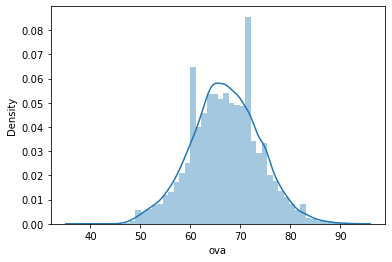

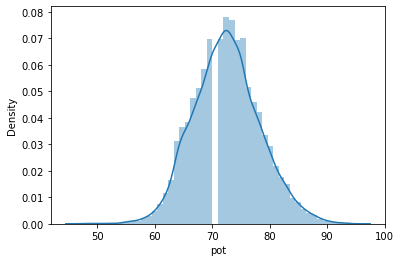

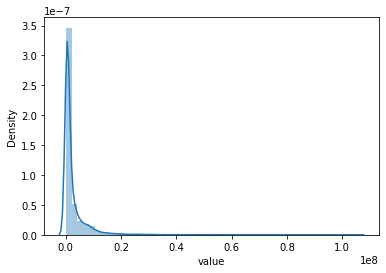

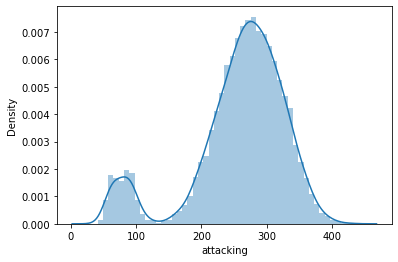

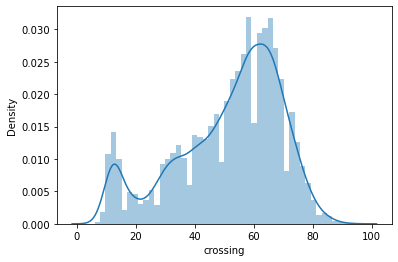

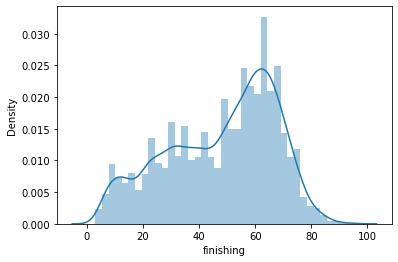

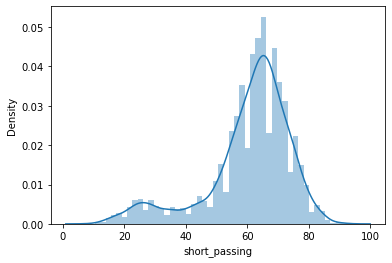

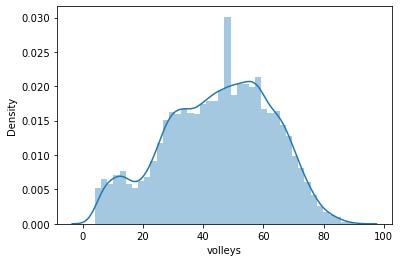

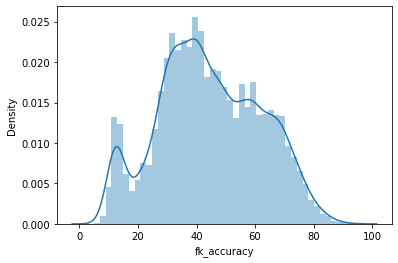

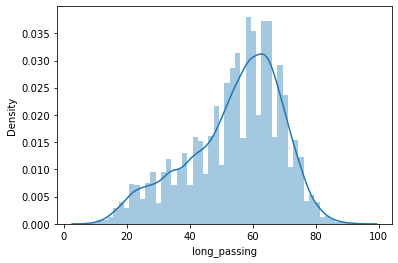

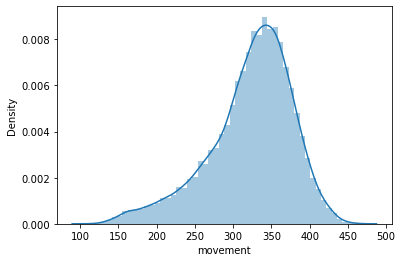

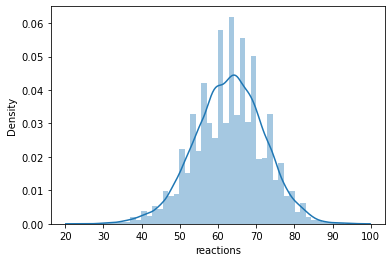

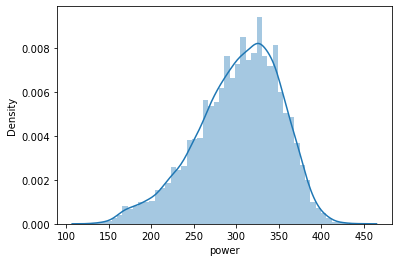

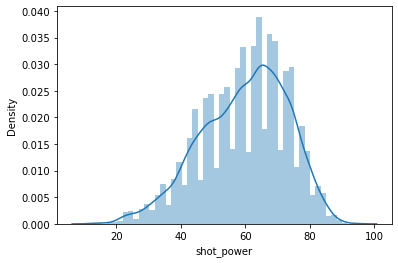

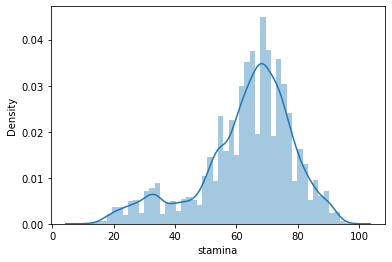

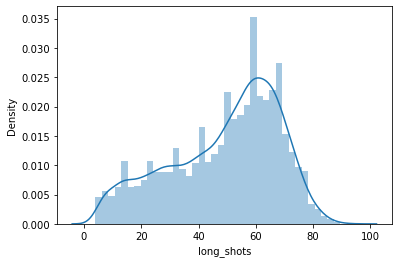

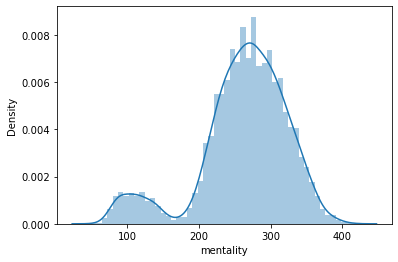

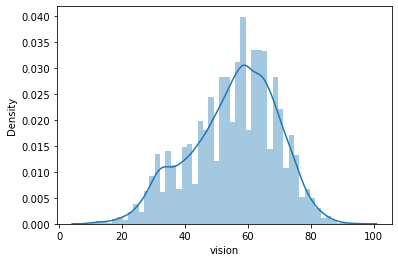

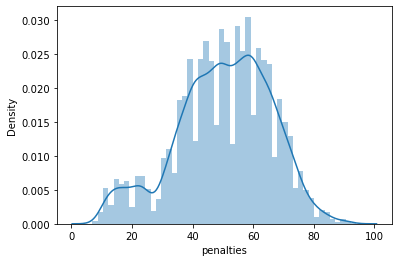

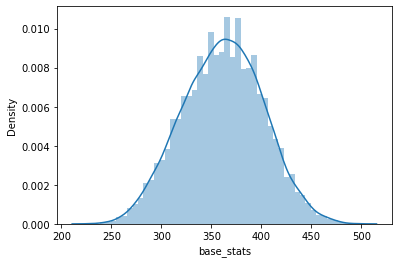

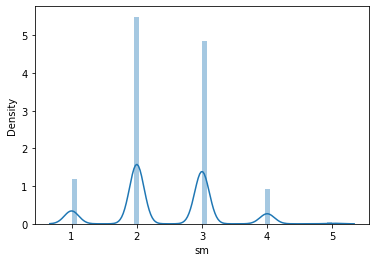

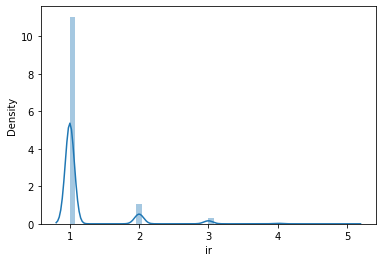

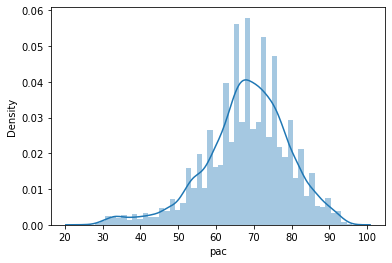

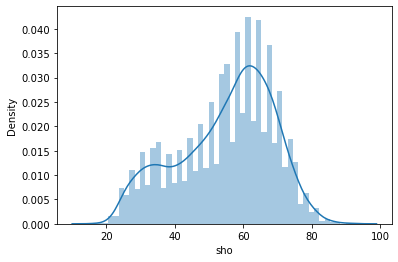

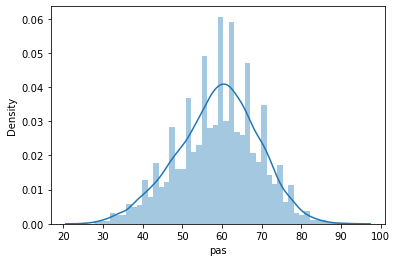

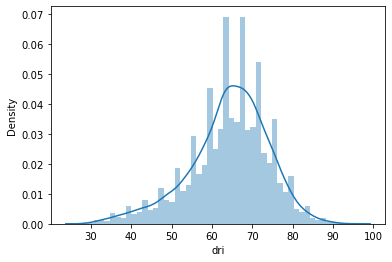

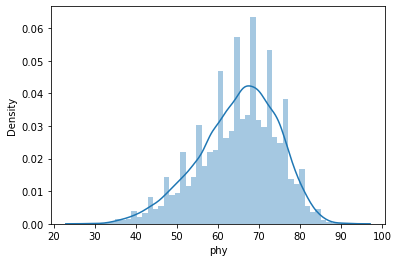

In [20]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

In [21]:
def remove_outliers(df, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [22]:
data1 = data.copy()
data1 = remove_outliers(data1, threshold=2, in_columns=['value'])

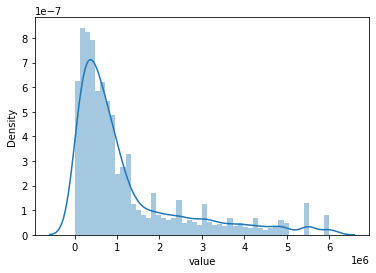

In [23]:
sns.distplot(data1["value"])
plt.show()

In [24]:
data1['aw'] = data1['aw'].fillna('Other')

In [25]:
data1["aw"].value_counts()

Medium    10082
High       4225
Low         804
Other        89
Name: aw, dtype: int64

In [26]:
data1['dw'] = data1['dw'].fillna('Other')

In [27]:
data1["dw"].value_counts()

Medium    11022
High       2489
Low        1600
Other        89
Name: dw, dtype: int64

In [28]:
data_aw = pd.get_dummies(data1['aw'], drop_first=True, prefix='aw') # i'm lazy!
print(data_aw)
data_dw = pd.get_dummies(data1['dw'], drop_first=True, prefix='dw') # i'm lazy!
print(data_dw)


        aw_Low  aw_Medium  aw_Other
id                                 
2            0          1         0
16           0          1         0
27           0          1         0
36           0          0         1
41           0          0         0
...        ...        ...       ...
259088       0          1         0
259090       0          1         0
259091       0          1         0
259101       0          0         0
259105       0          0         0

[15200 rows x 3 columns]
        dw_Low  dw_Medium  dw_Other
id                                 
2            0          0         0
16           0          1         0
27           1          0         0
36           0          0         1
41           0          1         0
...        ...        ...       ...
259088       0          1         0
259090       0          1         0
259091       0          1         0
259101       0          1         0
259105       0          1         0

[15200 rows x 3 columns]


In [29]:
y = data1['value']
X = data1.drop(['value'], axis=1)

In [30]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

In [31]:
X = np.concatenate([X_num, data_aw, data_dw], axis=1)
X.shape

(15200, 32)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
predictions = model.predict(X_test)

In [35]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.5459749338297937, 634953.1186541838, 907758.5717936287)

In [36]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [37]:
data1, _ci = boxcox_transform(data1)
data1

,ova,pot,value,attacking,crossing,finishing,short_passing,volleys,fk_accuracy,long_passing,...,base_stats,sm,aw,dw,ir,pac,sho,pas,dri,phy
id,,,,,,,,,,,,,,,,,,,,,
2,8690.489595,196.674973,21.947476,129450.582209,606.335676,96.375648,38112.028497,78.802402,34.246899,1063.421233,...,21199.851131,0.953693,Medium,High,0.062496,2966.768736,766.632556,739.562693,55052.530252,3571.893727
16,9292.308652,204.220101,21.844750,152122.805283,518.672955,130.563964,45825.502916,94.078390,43.273725,1119.020087,...,19152.470142,1.847526,Medium,Medium,0.000000,1632.153317,1011.466416,793.519398,50815.807324,2948.420597
27,9292.308652,204.220101,23.400319,152122.805283,672.014934,130.563964,47476.942284,104.911563,42.343191,1063.421233,...,16535.257111,2.704578,Medium,Low,0.062496,1168.167186,985.665035,848.998113,69106.708734,1967.218354
36,8398.212812,246.878447,23.689880,89244.690725,359.150515,145.754545,52654.907510,59.360206,27.271591,929.898054,...,17781.073783,0.000000,Other,Other,0.000000,2175.431699,934.933703,670.024105,50815.807324,2660.160920
41,12653.927939,242.922190,27.862077,183273.255791,606.335676,143.202063,72439.603454,111.149215,39.051915,1478.388690,...,22303.254419,2.704578,High,Medium,0.062497,1962.377989,1037.556966,1024.374332,91165.694094,2567.532433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,7285.983849,196.674973,21.626758,47081.615187,179.764942,36.841882,12469.040878,32.009264,20.449012,300.743468,...,12521.067114,0.953693,Medium,Medium,0.000000,1695.716214,231.333268,253.521226,18377.280861,3571.893727
259090,5328.306413,185.485304,18.198097,77851.803717,317.663038,80.028952,28772.323523,53.475076,29.298420,853.579037,...,13780.723579,0.953693,Medium,Medium,0.000000,2248.941617,493.391446,523.871229,28308.018041,2214.224732
259091,5328.306413,189.197893,18.198097,58741.874422,369.815354,59.875049,9194.579914,43.334917,20.988730,333.062748,...,12593.729167,0.953693,Medium,Medium,0.000000,2323.699018,304.032559,339.195495,22998.913497,2214.224732


In [38]:
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['value'])

In [50]:
mean_absolute_error(y_test, predictions)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').